In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
def linear_func(x, k, b):
    return k*x + b

In [5]:
def plot(x, y, function=linear_func, ejects=None, xlabel="", ylabel="", figsize=(12, 6), title="",
         dots_legend="", approx_legend="", name="graph"):
    '''
    Строит график и аппроксимирует его функцией


    x: массив иксов

    y: массив игриков

    function: функция, которой аппроксимируем, если передать None, то не аппроксимируем

    ejects: список индексов точек, которые считаем выбросами (их выбрасываем)

    xlabel: название оси x

    ylabel: название оси y

    figsize: размер графика

    title: название графика

    dots_legend: Подпись для точек

    approx_legend: Подпись для аппроксимации

    name: имя под которым сохраним график, если передать None, то не сохраним

    return popt -- параметры функции
    '''
    if ejects is not None:
        ejects = set(ejects)
    assert len(x) == len(y), "x and y must be the same size"

    if function is not None and ejects is not None:
        x_new, y_new = [], []
        for i in range(len(x)):
            if i not in ejects:
                x_new.append(x[i])
                y_new.append(y[i])
    else:
        x_new, y_new = x, y

    if function is not None:
        popt, *_ = curve_fit(function, xdata=x_new, ydata=y_new)

        x_model = np.linspace(min(x), max(x), 1000)
        y_model = function(x_model, *popt)

    
    plt.figure(figsize=figsize)
    plt.grid(True, linestyle="--")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x, y, "+r", label=dots_legend)
    if function is not None:
        plt.plot(x_model, y_model, color="blue", label=approx_legend)
    plt.legend()
    if name is not None:
        plt.savefig(f"{name}.pdf", format="pdf")

    return popt

Пункт 4

In [2]:
r = np.array([1.5, 3.5, 4.75, 5.5, 6])
m = np.arange(5) + 1

/tmp/ipykernel_750840/1478172220.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


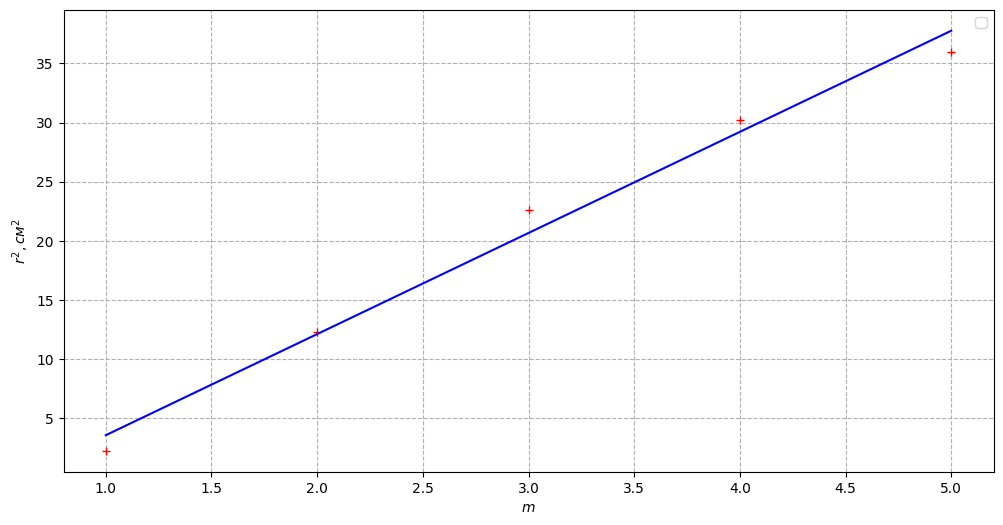

In [12]:
popt = plot(m, r**2, xlabel=r"$m$", ylabel=r"$r^2, см^2$", name="graph-1")

In [13]:
print(f"k = {popt[0]}")

k = 8.55


In [14]:
n_o = 2.29
lmbda = 0.63 / 10**6
L = 0.81
l = 26 / 1000

In [22]:
n_e = n_o - lmbda * n_o**2 * L**2 / (popt[0] / 10000) / L
print(f"n_e = {n_e}")

n_e = 2.2868701003157894
